In [2]:
import pickle
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pandas as pd
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from utils import *

/opt/anaconda3/envs/ali_env/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataPath = "GenePT_emebdding_v2/GenePT_gene_embedding_ada_text.pickle"
# load data
with open(dataPath , "rb") as f:
    data_PT = pickle.load(f)

In [4]:
gene_names_all = list(data_PT.keys())

print("Number of all genes: ", len(gene_names_all))
# print 10 names
print("First 10 gene names: ", gene_names_all[:10])
# Get the embedding for the first gene
gene_name_eg = 'AATK' # gene_names[0]
embedding = np.array(data_PT[gene_name_eg])
print("Gene name: ", gene_name_eg)
print("Embedding size: ", embedding.shape[0])


Number of all genes:  93800
First 10 gene names:  ['A1BG', 'A1BG-AS1', 'A1CF', 'A2M', 'A2M-AS1', 'A2ML1', 'A2ML1-AS1', 'A2MP1', 'A3GALT2', 'A4GALT']
Gene name:  AATK
Embedding size:  1536


In [5]:
data_path_sample = 'Data/PBMC/PBMC-ALL_ExpressionData.csv'
L = 10000 # number of cells to load (use None to load all cells)
if L is not None:
    data_sample = pd.read_csv(data_path_sample, header=0, index_col=0, usecols=range(L + 1)).T
else:
    data_sample = pd.read_csv(data_path_sample, header=0, index_col=0)
# data_sample = data_sample.transform(lambda x: np.log(x + 1))
print("Read data completed!")
# get number of genes and cells
num_cells_sample, num_genes_sample = data_sample.shape
print(f"Number of cells: {num_cells_sample}, Number of genes: {num_genes_sample}")
# get the name of the genes in the dataset
gene_names_sample = list(data_sample.columns)
# print("Name of the genes present in the sample ", gene_names_sample)


Read data completed!
Number of cells: 10000, Number of genes: 1000
Name of the genes present in the sample  ['AATK', 'ABCA1', 'ABCC3', 'ABHD1', 'ABLIM3', 'AC000068.5', 'AC002451.3', 'AC002456.2', 'AC005307.1', 'AC005523.3', 'AC005616.1', 'AC005808.3', 'AC006116.17', 'AC006547.14', 'AC007566.10', 'AC007879.2', 'AC011893.3', 'AC015969.3', 'AC016586.1', 'AC016700.5', 'AC022007.5', 'AC090186.1', 'AC092620.3', 'AC093157.1', 'AC104655.3', 'AC108025.2', 'AC137932.6', 'AC147651.3', 'ACRBP', 'ACTB', 'ACTG2', 'ACVRL1', 'ADAP2', 'AF131215.5', 'AFAP1-AS1', 'AGAP3', 'AGTRAP', 'AIF1', 'AIRE', 'AK4', 'AKR1C3', 'AL022344.7', 'AL049829.1', 'AL136376.1', 'AL359091.2', 'AL928768.3', 'ALDH1A1', 'ALDH4A1', 'ALOX12', 'ANKRD9', 'ANPEP', 'AP001053.11', 'AP001189.4', 'AP001626.1', 'AP003068.23', 'AP003774.6', 'AP006621.8', 'APCDD1', 'APLP2', 'APOBEC3A', 'APOBR', 'APP', 'AQP1', 'AQP10', 'ARG1', 'ARHGAP18', 'ARHGAP6', 'ARHGEF10L', 'ARHGEF28', 'ARHGEF40', 'ARID3A', 'ARMC3', 'ARNTL2', 'ARRDC5', 'ARSD', 'ASCL2', 'A

(802, 1536)
Distance matrix shape:  (802, 802)
Number of present genes:  802
Distance matrix small: 
[[0.         0.59884858 0.60156357 0.58290834 0.56059541]
 [0.59884858 0.         0.26761619 0.50947102 0.56348452]
 [0.60156357 0.26761619 0.         0.50199346 0.55304179]
 [0.58290834 0.50947102 0.50199346 0.         0.54302496]
 [0.56059541 0.56348452 0.55304179 0.54302496 0.        ]]


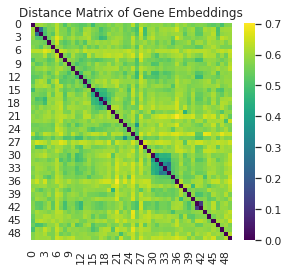

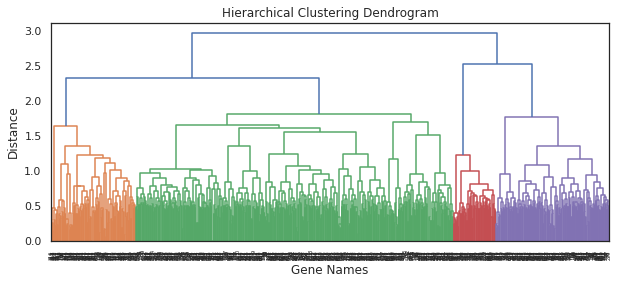

In [6]:
# Function to get the distance matrix and present genes
# X_sample_PT: the gene embeddings from PT for the genes present in the sample
distance_matrix_PT, present_genes, X_sample_PT = get_distance_matrix(gene_names_sample, gene_names_all, data_PT)
# save the name of the non-present genes
Non_present_genes = list(set(gene_names_sample) - set(present_genes))
with open('Data/PBMC/Non_present_genes.txt', 'w') as f:
    for gene in Non_present_genes:
        f.write(gene + '\n')

N = len(present_genes)
print("Distance matrix shape: ", distance_matrix_PT.shape)
print("Number of present genes: ", N)
# Print the distance matrix
print("Distance matrix small: ")
print(distance_matrix_PT[:5, :5])  # Print the first 5x5 submatrix

# Plot the distance matrix
sns.set(style='white')
plt.figure(figsize=(4.5, 4), facecolor='white')
sns.heatmap(distance_matrix_PT[:50,:50], cmap='viridis') # xticklabels=gene_names_subset, yticklabels=gene_names_subset,
plt.title('Distance Matrix of Gene Embeddings')
plt.show()

# apply heirarchical clustering to the distance matrix
linkage_matrix = linkage(squareform(distance_matrix_PT), method='ward')
plt.figure(figsize=(10, 4), facecolor='white')
dendrogram(linkage_matrix, leaf_rotation=90), # labels=present_genes, 
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Gene Names')
plt.ylabel('Distance')
plt.show()

Node feature shape:  (802, 10000)
X shape:  (802, 10000)


/opt/anaconda3/envs/ali_env/lib/python3.7/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/anaconda3/envs/ali_env/lib/python3.7/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


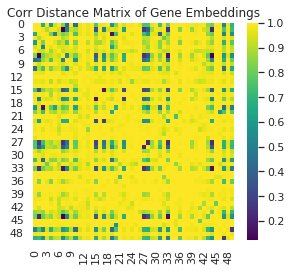

In [7]:
# get the expression of the present genes
node_feat = data_sample[present_genes].T.values
print("Node feature shape: ", node_feat.shape)
X_sample = np.array(node_feat)
print("X shape: ", X_sample.shape) # each row is the embedding of that gene
Corr_matrix = wgcna_grn(X_sample, beta=1)
Corr_dist = 1 - Corr_matrix

# Plot the corr distance matrix
sns.set(style='white')
plt.figure(figsize=(4.5, 4), facecolor='white')
sns.heatmap(Corr_dist[:50,:50], cmap='viridis') # xticklabels=gene_names_subset, yticklabels=gene_names_subset,
plt.title('Corr Distance Matrix of Gene Embeddings')
plt.show()





Number of shared edges:  460.0
Number of edges in PT adjacency matrix:  6119.0
Edge density in PT adjacency matrix:  0.019050376555490176
Number of edges in correlation matrix:  18559.0
Edge density in correlation matrix:  0.057780019364821404


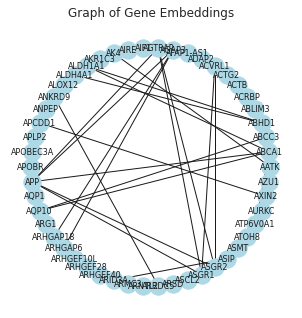

In [8]:
# Get the binary adjacency matrix from the correlation distance matrix
A_corr = get_adjacency_matrix(Corr_dist, threshold=0.5)
A_PT = get_adjacency_matrix(distance_matrix_PT, threshold=0.5)

plot_graph(A_PT[:50,:50], present_genes[:50])


# compare Adjacency matrix with correlation matrix numerically
NN2 = (N * (N - 1) / 2)
A_PT_flat = A_PT.flatten()
A_corr_flat = A_corr.flatten()
num_edges_PT = np.sum(A_PT_flat > 0) / 2
num_edges_corr = np.sum(A_corr_flat > 0) / 2
print("Number of edges in PT adjacency matrix: ", num_edges_PT)
print("Edge density in PT adjacency matrix: ", num_edges_PT / NN2)
print("Number of edges in correlation matrix: ", num_edges_corr)
print("Edge density in correlation matrix: ", num_edges_corr / NN2)
shared_edges = np.sum((A_PT_flat > 0) & (A_corr_flat > 0)) / 2
print("Number of shared edges: ", shared_edges)

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Convert numpy adjacency matrix to sparse format
A_PT_sparse = sp.csr_matrix(A_PT)
edge_index_PT, _ = from_scipy_sparse_matrix(A_PT_sparse)

A_corr_sparse = sp.csr_matrix(A_corr)
edge_index_corr, _ = from_scipy_sparse_matrix(A_corr_sparse)

num_nodes = A_PT.shape[0]
# Choose the initial embeddings:
x = torch.randn((num_nodes, 32)) # random guassian features
# x = torch.Tensor(X_sample) # gene expression features
# x = torch.Tensor(X_sample_PT) # genePT embeddings

# Create PyG data object
data = Data(x=x, edge_index=edge_index_PT).to(device)

# Target adjacency matrix for the training
adj_target = torch.FloatTensor(A_corr).to(device)

In [11]:
model = GraphAutoEncoder(in_channels=data.x.shape[1], hidden_channels_list=[64,64], out_channels=32).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.BCELoss()

model.train()
loss_min = 10e9
epoch_min = 0
for epoch in range(0, 5001):
    optimizer.zero_grad()
    adj_pred = model(data.x, data.edge_index)
    loss = adj_bce_loss(adj_pred, adj_target, mask=None) # None: loss is calculated on the whole upper triangle of the adjacency matrix
    if loss.item() < loss_min:
        loss_min = loss.item()
        epoch_min = epoch
        torch.save(model.state_dict(), 'Data/PBMC/model.pt')
    loss.backward()
    optimizer.step()
    
    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}, Best Loss: {loss_min:.4f}, Best Epoch: {epoch_min}")


Epoch 0, Loss: 0.7062, Best Loss: 0.7062, Best Epoch: 0
Epoch 500, Loss: 0.1774, Best Loss: 0.1765, Best Epoch: 470
Epoch 1000, Loss: 0.1679, Best Loss: 0.1671, Best Epoch: 763
Epoch 1500, Loss: 0.1857, Best Loss: 0.1561, Best Epoch: 1476
Epoch 2000, Loss: 0.2598, Best Loss: 0.1395, Best Epoch: 1958
Epoch 2500, Loss: 0.1750, Best Loss: 0.1395, Best Epoch: 1958
Epoch 3000, Loss: 0.1722, Best Loss: 0.1395, Best Epoch: 1958
Epoch 3500, Loss: 0.1721, Best Loss: 0.1395, Best Epoch: 1958
Epoch 4000, Loss: 0.1702, Best Loss: 0.1395, Best Epoch: 1958
Epoch 4500, Loss: 0.2061, Best Loss: 0.1395, Best Epoch: 1958
Epoch 5000, Loss: 0.1868, Best Loss: 0.1395, Best Epoch: 1958


Best threshold (ROC): 0.08
Best threshold (PR): 0.08


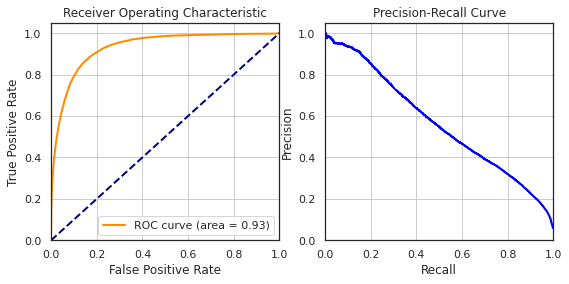

ROC AUC: 93.12
Precision: 77.68, Recall: 26.53, F1: 39.55
Confusion Matrix:
[[301227   1415]
 [ 13635   4924]]


In [12]:
# load the saved model
model.load_state_dict(torch.load('Data/PBMC/model.pt'))
model.eval()
with torch.no_grad():
    adj_pred_eval = model(data.x, data.edge_index) 

# Remove self-loops (diagonal)
adj_pred_eval = adj_pred_eval * (1 - torch.eye(adj_pred_eval.size(0)).to(adj_pred_eval.device))

# Use the upper triangle indices (excluding diagonal)
N = adj_pred_eval.shape[0]
triu_indices = torch.triu_indices(N, N, offset=1)
adj_pred_eval[triu_indices[1], triu_indices[0]] = adj_pred_eval[triu_indices[0], triu_indices[1]]


# Flatten only the upper triangle
adj_true_flat = adj_target[triu_indices[0], triu_indices[1]]
adj_pred_flat = adj_pred_eval[triu_indices[0], triu_indices[1]]


# Threshold to get binary adjacency
threshold = 0.50
adj_pred_eval_binary = (adj_pred_eval > threshold).float()
adj_pred_binary_flat = adj_pred_eval_binary[triu_indices[0], triu_indices[1]]
infered_grn = adj_pred_eval_binary

# Compute metrics
roc_auc = roc_auc_score(adj_true_flat.cpu().numpy(), adj_pred_flat.cpu().numpy())
f1 = f1_score(adj_true_flat.cpu().numpy(), adj_pred_binary_flat.cpu().numpy())
precision = precision_score(adj_true_flat.cpu().numpy(), adj_pred_binary_flat.cpu().numpy())
recall = recall_score(adj_true_flat.cpu().numpy(), adj_pred_binary_flat.cpu().numpy())
confusion = confusion_matrix(adj_true_flat.cpu().numpy(), adj_pred_binary_flat.cpu().numpy())

# Print results
print(f"ROC AUC: {roc_auc*100:.2f}")
print(f"Precision: {precision*100:.2f}, Recall: {recall*100:.2f}, F1: {f1*100:.2f}")
print("Confusion Matrix:")
print(confusion)

# plot the ROC curve
fpr, tpr, thresholds_pred = roc_curve(adj_true_flat.cpu().numpy(), adj_pred_flat.cpu().numpy())
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(9, 4), facecolor='white')
plt.subplot(1,2,1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# get the best threshold from the fpr, tpr, thresholds_pred
best_threshold_roc = thresholds_pred[np.argmax(tpr - fpr)]
print(f"Best threshold (ROC): {best_threshold_roc:.2f}")


# plot the recall-precision curve
precision, recall, thresholds_pred = precision_recall_curve(adj_true_flat.cpu().numpy(), adj_pred_flat.cpu().numpy())
plt.subplot(1,2,2)
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
# get the best threshold from the precision, recall, thresholds_pred
best_threshold_pr = thresholds_pred[np.argmax(precision + recall)]
print(f"Best threshold (PR): {best_threshold_pr:.2f}")

plt.show()


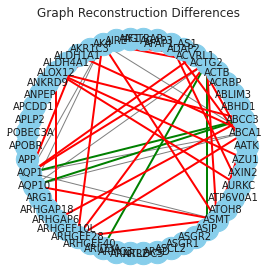

In [13]:
# plot the added and removed edges of the correlation graph:
plot_diff_graph(adj_original=adj_target[:50,:50].cpu().numpy(),
                adj_reconstructed=infered_grn[:50,:50].cpu().numpy(),
                node_labels=present_genes[:50],)

In [14]:
# Save the inferred GRN to a CSV file


infered_grn = adj_pred_eval_binary
infered_grn = infered_grn.cpu().numpy()
i, j = np.triu_indices_from(infered_grn, k=1)
nonzero_mask = infered_grn[i, j] != 0
i = i[nonzero_mask]
j = j[nonzero_mask]

# Create edge list with gene names
edges = [(present_genes[src], present_genes[tgt]) for src, tgt in zip(i, j)]

# Save to CSV
edges_df = pd.DataFrame(edges, columns=['Gene1', 'Gene2'])
edges_df.to_csv('Data/PBMC/GnnPT_edges.csv', index=False)

In [15]:
# repeat the same with the correlation matrix
corr_grn = adj_target
corr_grn = corr_grn.cpu().numpy()
i_corr, j_corr = np.triu_indices_from(corr_grn, k=1)
nonzero_mask_corr = corr_grn[i_corr, j_corr] != 0
i_corr = i_corr[nonzero_mask_corr]
j_corr = j_corr[nonzero_mask_corr]

# Create edge list with gene names
edges_corr = [(present_genes[src], present_genes[tgt]) for src, tgt in zip(i_corr, j_corr)]

# Save to CSV
edges_corr_df = pd.DataFrame(edges_corr, columns=['Gene1', 'Gene2'])
edges_corr_df.to_csv('Data/PBMC/Corr_edges.csv', index=False)

In [16]:
# repeat the same with the PT embeddings
PT_grn = A_PT_sparse
PT_grn = PT_grn.toarray()
i_PT, j_PT = np.triu_indices_from(PT_grn, k=1)
nonzero_mask_PT = PT_grn[i_PT, j_PT] != 0
i_PT = i_PT[nonzero_mask_PT]
j_PT = j_PT[nonzero_mask_PT]

# Create edge list with gene names
edges_PT = [(present_genes[src], present_genes[tgt]) for src, tgt in zip(i_PT, j_PT)]

# Save to CSV
edges_PT_df = pd.DataFrame(edges_PT, columns=['Gene1', 'Gene2'])
edges_PT_df.to_csv('Data/PBMC/PT_edges.csv', index=False)

Jaccard Index Results:
         Ref    Corr      PT     Our
Ref      1.0  0.0059  0.0066  0.0005
Corr  0.0059     1.0   0.019  0.2465
PT    0.0066   0.019     1.0  0.0142
Our   0.0005  0.2465  0.0142     1.0


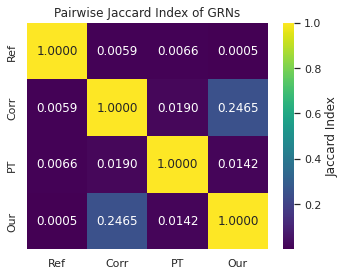

In [17]:
# Load the three GRNs with the true GRN to compare them:


corr_grn = load_edge_set('Data/PBMC/Corr_edges.csv')
our_grn = load_edge_set('Data/PBMC/GnnPT_edges.csv')
pt_grn = load_edge_set('Data/PBMC/PT_edges.csv')
ref_grn = load_edge_set('Data/PBMC/PBMC-ALL_Imposed_GRN.csv')

# Keep the same genes in the ref genes
ref_grn = set((g1, g2) for g1, g2 in ref_grn if g1 in present_genes and g2 in present_genes)

# List of all GRNs
grns = [ref_grn, corr_grn, pt_grn, our_grn]



# Create a DataFrame to store the results
jaccard_results = pd.DataFrame(index=['Ref', 'Corr', 'PT', 'Our'], columns=['Ref', 'Corr', 'PT', 'Our'])
# Fill the DataFrame with Jaccard indices
for i, grn1 in enumerate(grns):
    for j, grn2 in enumerate(grns):
        jaccard_results.iloc[i, j] = np.round(jaccard_index(grn1, grn2),4)

print("Jaccard Index Results:")
print(jaccard_results)

# plot the Jaccard Index results as a heatmap
plt.figure(figsize=(5, 4), facecolor='white')
sns.heatmap(jaccard_results.astype(float), annot=True, cmap='viridis', fmt=".4f", cbar_kws={'label': 'Jaccard Index'})
plt.title('Pairwise Jaccard Index of GRNs')
# plt.xlabel('GRN 1')
# plt.ylabel('GRN 2')
# plt.xticks(rotation=45)
# plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('Plots/PBMC.jpg', dpi=300)
plt.show()


In [26]:
# Get the set of all genes in the reference GRN
all_genes = set()
for u, v in ref_grn:
    all_genes.add(u)
    all_genes.add(v)

# Compute confusion matrices
cm_corr, f1_corr = compute_confusion_matrix(corr_grn, ref_grn, all_genes)
cm_pt, f1_pt = compute_confusion_matrix(pt_grn, ref_grn, all_genes)
cm_our, f1_our = compute_confusion_matrix(our_grn, ref_grn, all_genes)

# display the confusion matrices for the two networks
print("Confusion Matrix for Correlation Network:")
print(cm_corr, "F1 Score: ", f1_corr)

print("Confusion Matrix for PT Network:")
print(cm_pt, "F1 Score: ", f1_pt)

print("Confusion Matrix for GNN Network:")
print(cm_our, "F1 Score: ", f1_our)

Number of all genes in the reference GRN:  802
Confusion Matrix for Correlation Network:
[[291732  18384]
 [ 10910    175]] F1 Score:  1.1806773714748346
Confusion Matrix for PT Network:
[[304109   6007]
 [ 10973    112]] F1 Score:  1.3020227853987445
Confusion Matrix for GNN Network:
[[303786   6330]
 [ 11076      9]] F1 Score:  0.10330578512396692


In [19]:
# check the correlation and PT distance compared to the true adjacency matrix
Feature1 = distance_matrix_PT[triu_indices[0], triu_indices[1]]
Feature2 = Corr_matrix[triu_indices[0], triu_indices[1]]
True_adj = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        if i != j:
            True_adj[i,j] = 1 if (present_genes[i], present_genes[j]) in ref_grn else 0
True_labels = True_adj[triu_indices[0], triu_indices[1]]

Logistic Regression Coefficients:
PTDist Coefficient: -2.6879, Corr Coefficient: -1.9912
Logistic Regression Accuracy: 96.55
Confusion Matrix for Logistic Regression:
[[310116      0]
 [ 11085      0]]


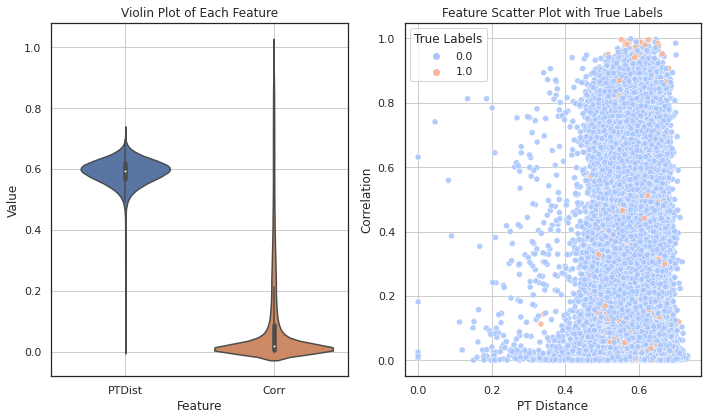

In [30]:
# check how well we can predict the true labels using the two features
from sklearn.linear_model import LogisticRegression
# Combine features into a DataFrame
features_df = pd.DataFrame({
    'PTDist': Feature1,
    'Corr': Feature2,
    'True_labels': True_labels
})


# Split into features and target
X = features_df[['PTDist', 'Corr']]
y = features_df['True_labels']
# Train a logistic regression model
model_lr = LogisticRegression()
model_lr.fit(X, y)
# Get the coefficients
coefficients = model_lr.coef_[0]
print("Logistic Regression Coefficients:")
print(f"PTDist Coefficient: {coefficients[0]:.4f}, Corr Coefficient: {coefficients[1]:.4f}")
# Get the accuracy of the model
accuracy = model_lr.score(X, y)
print(f"Logistic Regression Accuracy: {100*accuracy:.2f}")
# get the confusion matrix
y_pred = model_lr.predict(X)
cm_lr = confusion_matrix(y, y_pred)
print("Confusion Matrix for Logistic Regression:")
print(cm_lr)

# Melt the DataFrame to long format
melted_df = X.melt(var_name='Feature', value_name='Value')

# Plot the violin plot
plt.figure(figsize=(10, 6), facecolor='white')
plt.subplot(1, 2, 1)
sns.violinplot(x='Feature', y='Value', data=melted_df)
plt.title('Violin Plot of Each Feature')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.grid()
# plot the features with the true labels
plt.subplot(1, 2, 2)
sns.scatterplot(x=Feature1, y=Feature2, hue=True_labels, palette='coolwarm', alpha=0.9)
plt.title('Feature Scatter Plot with True Labels')
plt.xlabel('PT Distance')
plt.ylabel('Correlation')
plt.legend(title='True Labels', loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()


